### classify_insect_std_20200806

In [1]:
import h5py
from sklearn.mixture import GaussianMixture as GMM
import numpy as np
from os import getcwd as cwd
from os.path import join as pj
import matplotlib.pyplot as plt
%matplotlib inline

# evaluation
from evaluation.classification.statistics import get_size_list_from_xte

In [2]:
def get_insect_size_dic(X, Y, lbl_to_name):
    """
        get dictionary of label to size
        Args:
            - X: np.array, shape==[insect_num, height, width, channels]
            - Y: np.array, shape==[insect_num]
            - lbl_to_name: dict, {label: label_name}
    """
    X_size = np.array(get_size_list_from_xte(X))
    insect_size_dic = {}
    for i in range(len(lbl_to_name)):
        insect_filter = Y == i
        filtered_X_size = X_size[insect_filter]
        filtered_X_size = np.sort(filtered_X_size)
        insect_size_dic.update({lbl_to_name[i]: filtered_X_size})
    return insect_size_dic

def gaussian(mu, sigma):
    """
        return gaussian distribution
        Args:
            - mu: np.array(dtype=float), shape=[K]
            - sigma: np.array(dtype=float), shape=[K]
    """
    def f(x):
        return np.exp(-0.5 * (x - mu) ** 2 / sigma) / np.sqrt(2 * np.pi * sigma)
    return f

def laplace(mu, sigma):
    """
        return laplace distribution
        Args:
            - mu: np.array(dtype=float), shape=[K]
            - sigma: np.array(dtype=float), shape=[K]
    """
    b = np.sqrt(sigma / 2)
    def f(x):
        return 1 / (2 * b) * np.exp(-1 * np.abs(x - mu) / b)
    return f

In [3]:
lbl_to_name = {
    0: 'Diptera', 
    1: 'Ephemeridae', 
    2: 'Ephemeroptera', 
    3: 'Lepidoptera', 
    4: 'Plecoptera', 
    5: 'Trichoptera', 
}

In [4]:
all_data_path = pj(cwd(), "data/all_classification_data/classify_insect_std_20200806")
with h5py.File(all_data_path) as f:
    X = f["X"][:]
    Y = f["Y"][:]

In [5]:
insect_size_dic = get_insect_size_dic(X, Y, lbl_to_name)

mu = 11.621745343986495, sigma = 1.7181926510995773


Text(0.5, 1.0, 'Diptera')

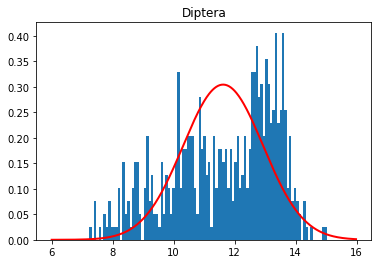

In [6]:
# initialize
gmm = GMM(n_components=1, covariance_type="spherical")
x = np.log2(insect_size_dic["Diptera"])
# train GMM
gmm.fit(x.reshape(-1, 1))
# visualize GMM
mu_diptera = gmm.means_.reshape([-1])
sigma_diptera = np.sqrt(gmm.covariances_)
for mu_elem, sigma_elem in zip(mu_diptera, sigma_diptera):
    print("mu = {}, sigma = {}".format(mu_elem, sigma_elem))

plt.hist(x, bins=100, density=True)
seq = np.arange(6.0, 16.0, 0.02)
plt.plot(seq, gaussian(mu_diptera[0], sigma_diptera[0])(seq), linewidth=2, color="red")
#plt.plot(seq, gaussian(mu_diptera[1], sigma_diptera[1])(seq), linewidth=2, color="orange")
plt.title("Diptera")

mu = 13.156389134540905, sigma = 0.6106979826352166


Text(0.5, 1.0, 'Ephemeridae')

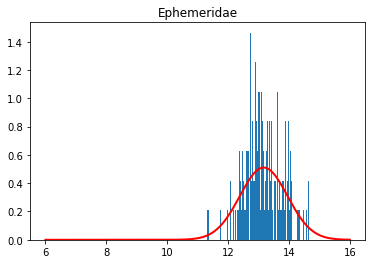

In [7]:
# initialize
gmm = GMM(n_components=1, covariance_type="spherical")
x = np.log2(insect_size_dic["Ephemeridae"])
# train GMM
gmm.fit(x.reshape(-1, 1))
# visualize GMM
mu_ephemeridae = gmm.means_.reshape([-1])
sigma_ephemeridae = np.sqrt(gmm.covariances_)
for mu_elem, sigma_elem in zip(mu_ephemeridae, sigma_ephemeridae):
    print("mu = {}, sigma = {}".format(mu_elem, sigma_elem))

plt.hist(x, bins=100, density=True)
seq = np.arange(6.0, 16.0, 0.02)
plt.plot(seq, gaussian(mu_ephemeridae[0], sigma_ephemeridae[0])(seq), linewidth=2, color="red")
plt.title("Ephemeridae")

mu = 10.989064618392351, sigma = 1.237532505380402


Text(0.5, 1.0, 'Ephemeroptera')

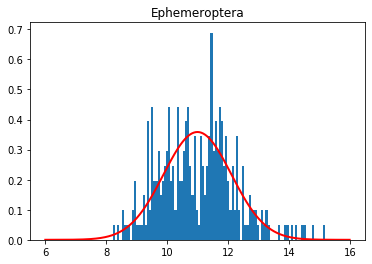

In [8]:
# initialize
gmm = GMM(n_components=1, covariance_type="spherical")
x = np.log2(insect_size_dic["Ephemeroptera"])
# train GMM
gmm.fit(x.reshape(-1, 1))
# visualize GMM
mu_ephemeroptera = gmm.means_.reshape([-1])
sigma_ephemeroptera = np.sqrt(gmm.covariances_)
for mu_elem, sigma_elem in zip(mu_ephemeroptera, sigma_ephemeroptera):
    print("mu = {}, sigma = {}".format(mu_elem, sigma_elem))

plt.hist(x, bins=100, density=True)
seq = np.arange(6.0, 16.0, 0.02)
plt.plot(seq, gaussian(mu_ephemeroptera[0], sigma_ephemeroptera[0])(seq), linewidth=2, color="red")
plt.title("Ephemeroptera")

mu = 12.68085061426625, sigma = 1.2809743800315292


Text(0.5, 1.0, 'Lepidoptera')

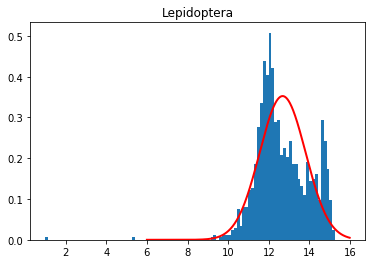

In [9]:
# initialize
gmm = GMM(n_components=1, covariance_type="spherical")
x = np.log2(insect_size_dic["Lepidoptera"])
# train GMM
gmm.fit(x.reshape(-1, 1))
# visualize GMM
mu_lepidoptera = gmm.means_.reshape([-1])
sigma_lepidoptera = np.sqrt(gmm.covariances_)
for mu_elem, sigma_elem in zip(mu_lepidoptera, sigma_lepidoptera):
    print("mu = {}, sigma = {}".format(mu_elem, sigma_elem))

plt.hist(x, bins=100, density=True)
seq = np.arange(6.0, 16.0, 0.02)
plt.plot(seq, gaussian(mu_lepidoptera[0], sigma_lepidoptera[0])(seq), linewidth=2, color="red")
#plt.plot(seq, gaussian(mu_lepidoptera[1], sigma_lepidoptera[1])(seq), linewidth=2, color="orange")
plt.title("Lepidoptera")

mu = 11.38243516582298, sigma = 0.8049635620799064


Text(0.5, 1.0, 'Plecoptera')

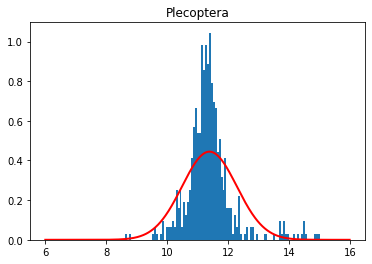

In [10]:
# initialize
gmm = GMM(n_components=1, covariance_type="spherical")
x = np.log2(insect_size_dic["Plecoptera"])
# train GMM
gmm.fit(x.reshape(-1, 1))
# visualize GMM
mu_plecoptera = gmm.means_.reshape([-1])
sigma_plecoptera = np.sqrt(gmm.covariances_)
for mu_elem, sigma_elem in zip(mu_plecoptera, sigma_plecoptera):
    print("mu = {}, sigma = {}".format(mu_elem, sigma_elem))

plt.hist(x, bins=100, density=True)
seq = np.arange(6.0, 16.0, 0.02)
plt.plot(seq, gaussian(mu_plecoptera[0], sigma_plecoptera[0])(seq), linewidth=2, color="red")
plt.title("Plecoptera")

mu = 11.672449439591857, sigma = 0.8279052362708695


Text(0.5, 1.0, 'Trichoptera')

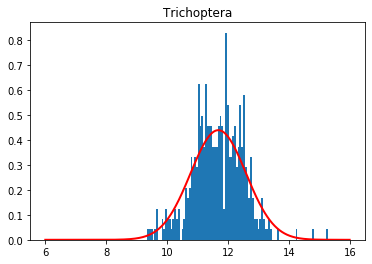

In [11]:
# initialize
gmm = GMM(n_components=1, covariance_type="spherical")
x = np.log2(insect_size_dic["Trichoptera"])
# train GMM
gmm.fit(x.reshape(-1, 1))
# visualize GMM
mu_trichoptera = gmm.means_.reshape([-1])
sigma_trichoptera = np.sqrt(gmm.covariances_)
for mu_elem, sigma_elem in zip(mu_trichoptera, sigma_trichoptera):
    print("mu = {}, sigma = {}".format(mu_elem, sigma_elem))

plt.hist(x, bins=100, density=True)
seq = np.arange(6.0, 16.0, 0.02)
plt.plot(seq, gaussian(mu_trichoptera[0], sigma_trichoptera[0])(seq), linewidth=2, color="red")
plt.title("Trichoptera")

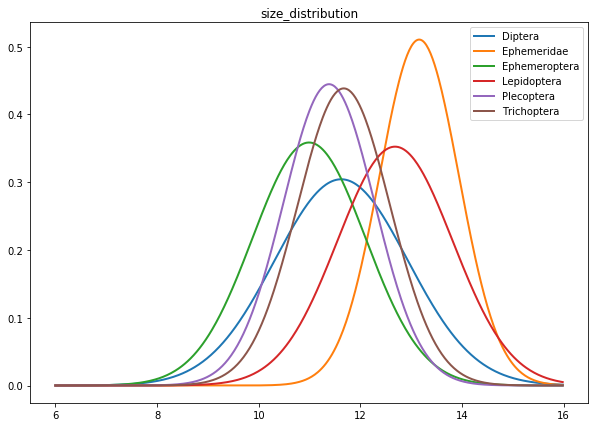

In [18]:
plt.figure(figsize=(10,7))
plt.plot(seq, gaussian(mu_diptera[0], sigma_diptera[0])(seq), linewidth=2, label="Diptera")
plt.plot(seq, gaussian(mu_ephemeridae[0], sigma_ephemeridae[0])(seq), linewidth=2, label="Ephemeridae")
plt.plot(seq, gaussian(mu_ephemeroptera[0], sigma_ephemeroptera[0])(seq), linewidth=2, label="Ephemeroptera")
plt.plot(seq, gaussian(mu_lepidoptera[0], sigma_lepidoptera[0])(seq), linewidth=2, label="Lepidoptera")
plt.plot(seq, gaussian(mu_plecoptera[0], sigma_plecoptera[0])(seq), linewidth=2, label="Plecoptera")
plt.plot(seq, gaussian(mu_trichoptera[0], sigma_trichoptera[0])(seq), linewidth=2, label="Trichoptera")
plt.title("size_distribution")
plt.legend()